# Project 2
### Minh Tu Bui, Juliana Rosa, Camilo Velez

In [275]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Bank client data:
1. age: Age of clients
2. job: Types of job of clients 
3. marital : Marital status 
4. education: Education levels 
5. default: has credit in default? (categorical: "no","yes","unknown")
6. housing: has housing loan? (categorical: "no","yes","unknown")
7. loan: has personal loan? (categorical: "no","yes","unknown")

The last contact of the current campaign:
8. contact: contact communication type (categorical: "cellular","telephone")
9. month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
10. dayofweek: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:
12. campaign: number of contacts performed during this campaign and for this client 
13. pdays: number of days that passed by after the client was last contacted from a previous campaign 
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. outcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

Social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: "yes","no")

In [276]:
git@github.com:camilovelezr/cl201.gitdf = pd.read_csv('bank_additional_full.csv', sep=';')

In [277]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [278]:
df.shape

(41188, 21)

In [279]:
df.columns.str.replace('.', '_')

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [280]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [281]:
df = df[['age', 'job', 'marital', 'education', 'housing', 'loan', 'campaign', 'previous', 'poutcome', 'y']]

In [282]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
housing      0
loan         0
campaign     0
previous     0
poutcome     0
y            0
dtype: int64

In [283]:
df.describe(include = 'all')

,age,job,marital,education,housing,loan,campaign,previous,poutcome,y
count,41188.00000,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188,41188
unique,NaN,12,4,8,3,3,NaN,NaN,3,2
top,NaN,admin.,married,university.degree,yes,no,NaN,NaN,nonexistent,no
freq,NaN,10422,24928,12168,21576,33950,NaN,NaN,35563,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,2.567593,0.172963,NaN,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,2.770014,0.494901,NaN,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,NaN,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000,NaN,NaN


In [284]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [285]:
mask = df.education.isin(['basic.9y', 'basic.4y', 'basic.6y'])
mask.sum()

12513

In [286]:
df.loc[mask, 'education'] = df.loc[mask, 'education'].replace(['basic.9y', 'basic.4y', 'basic.6y'], 'basic')

df.education.value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [287]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [288]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [289]:
df = df.replace({"unknown": np.NaN})

In [290]:
df = df.dropna()
df.job.value_counts()

admin.           9937
blue-collar      8560
technician       6380
services         3716
management       2728
retired          1577
entrepreneur     1360
self-employed    1349
housemaid         987
unemployed        963
student           688
Name: job, dtype: int64

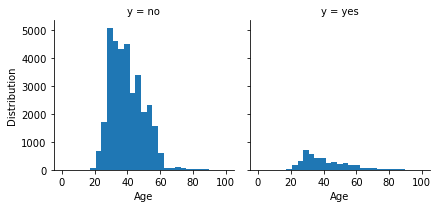

In [291]:
fig1 = sns.FacetGrid(df, 
                     col="y", 
                     margin_titles=True)
fig1.map(plt.hist, "age", bins= np.linspace(0, 100, 30))
fig1.set_axis_labels("Age", "Distribution")

Most of the customers of the bank are in the range of 30-40.

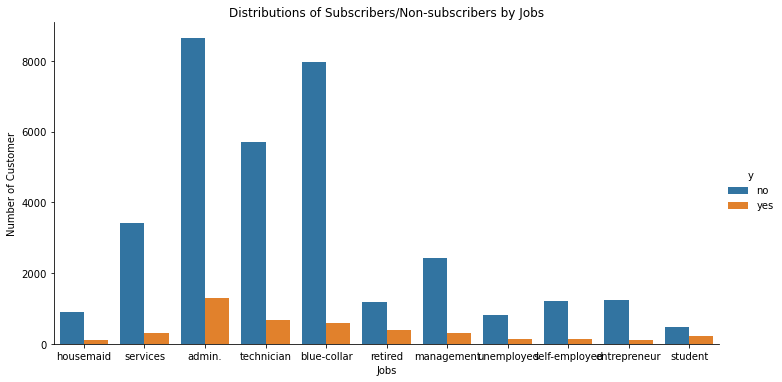

In [292]:
sns.catplot(x="job", data=df, aspect=2, kind='count', hue='y')
plt.xlabel("Jobs")
plt.ylabel("Number of Customer")
plt.title("Distributions of Subscribers/Non-subscribers by Jobs")
plt.show()

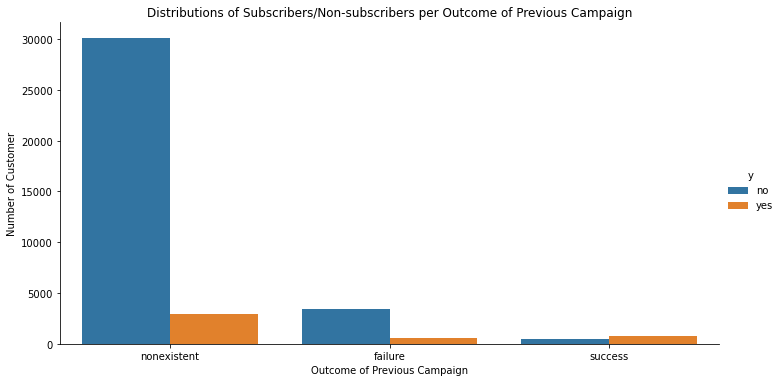

In [293]:
sns.catplot(x="poutcome", data=df, aspect=2, kind='count', hue='y')
plt.xlabel("Outcome of Previous Campaign")
plt.ylabel("Number of Customer")
plt.title("Distributions of Subscribers/Non-subscribers per Outcome of Previous Campaign")
plt.show()

In [294]:
X = df.drop(['y'], axis = 1) 
y = df.y 
X = pd.get_dummies(X, drop_first = True)
X.head()

,age,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,marital_married,marital_single,education_high.school,education_illiterate,education_professional.course,education_university.degree,housing_yes,loan_yes,poutcome_nonexistent,poutcome_success
0,56,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,57,1,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
2,37,1,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,1,0,1,0
3,40,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,56,1,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0


In [295]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

LogReg = LogisticRegression()

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)


y_pred=LogReg.predict(X_test)

print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )

Classes ['no' 'yes']
Intercept [-2.24472364]
Coefficients [[ 0.03327488 -0.27175377  0.19752716 -0.18566942 -0.05336481 -0.04117188
  -0.03848977  0.13152386 -0.02339183 -0.10916321  0.110696   -0.04860109
   0.01068251  0.0276199   0.10803366  0.02988474  0.02636564  0.03912347
   0.09009695  0.01603599 -0.01971241  0.02120521  0.38502838]]


1. Coefficients: the regression coefficients represent the change in the logit for each unit change in the predictors.
2. Intercept: Logistic regression estimate when all variables in the model are evaluated at zero.

In [296]:
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.9024262706546747
              precision    recall  f1-score   support

          no       0.91      0.99      0.95      8535
         yes       0.68      0.17      0.28      1027

    accuracy                           0.90      9562
   macro avg       0.79      0.58      0.61      9562
weighted avg       0.88      0.90      0.88      9562



1. Precision: Among the cases with the predictions that the clients do not subscribe the bank term deposit, 91% did not actually subscribe. Among the cases with the predictions that the clients subscribe the bank term deposit, 68% subscribed.
2. Recall: For all cases in which the clients did not subscribe, 99% is predicted correctly. For all cases in which the clients did subscribe, 17% is classified correctly.
3. F1-score: the F1-score provides a better measure of the incorrectly classified cases, and since we are more interested in true positives and true negatives we will give more weight to the accuracy than to the F1-score of 0.28. For this we need to state that False Positives are not a problem if we assume that the bank's cost of trying to get a customer to sign up is not too high.
4. Accuracy: 90% of the cases are classified correctly.

In [297]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[8452,   83],
       [ 850,  177]])

Text(0.5, 257.44, 'Predicted label')

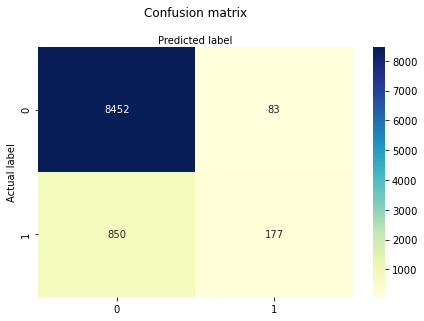

In [298]:
categories = [0,1] 
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Boosted Trees With Tensorflow

In [299]:
import tensorflow as tf
tf.random.set_seed(243)

In [300]:
df.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,y
0,56,housemaid,married,basic,no,no,1,0,nonexistent,no
1,57,services,married,high.school,no,no,1,0,nonexistent,no
2,37,services,married,high.school,yes,no,1,0,nonexistent,no
3,40,admin.,married,basic,no,no,1,0,nonexistent,no
4,56,services,married,high.school,no,yes,1,0,nonexistent,no


In [301]:
df.shape

(38245, 10)

In [302]:
len(y)

38245

In [303]:
y = y.map({'yes':1, 'no':0})

In [304]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'campaign',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [305]:
df.dtypes

age           int64
job          object
marital      object
education    object
housing      object
loan         object
campaign      int64
previous      int64
poutcome     object
y            object
dtype: object

The Categorical variables are Job, Marital, Education, Housing, Loan, and Poutcome

The numerical variables are age, campaign and previous

In [306]:
df = df.drop('y', axis=1)

In [307]:
df.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome
0,56,housemaid,married,basic,no,no,1,0,nonexistent
1,57,services,married,high.school,no,no,1,0,nonexistent
2,37,services,married,high.school,yes,no,1,0,nonexistent
3,40,admin.,married,basic,no,no,1,0,nonexistent
4,56,services,married,high.school,no,yes,1,0,nonexistent


In [308]:
dftrain,dftest,ytrain,ytest=train_test_split(df,y,test_size=0.20,random_state=0)

### Defining Categorical and Numeric Columns

In [309]:
categorical_columns = ['job', 'marital', 'education', 'housing', 'loan', 'poutcome']
numeric_columns = ['age', 'campaign', 'previous']

### Defining a function to perform one-hot-encoding

In [310]:
def one_hot_cat_column(feature_name, vocab):
    return tf.feature_column.indicator_column(
tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocab))

In [311]:
feature_columns =[]
for feature_name in categorical_columns:
    #one-hot encode categorical features
    vocabulary = dftrain[feature_name].unique()
    feature_columns.append(one_hot_cat_column(feature_name, vocabulary))

In [312]:
for feature_name in numeric_columns:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

In [313]:
feature_columns

[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='job', vocabulary_list=('admin.', 'services', 'technician', 'self-employed', 'unemployed', 'blue-collar', 'management', 'retired', 'student', 'entrepreneur', 'housemaid'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='marital', vocabulary_list=('divorced', 'married', 'single'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='education', vocabulary_list=('university.degree', 'basic', 'professional.course', 'high.school', 'illiterate'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='housing', vocabulary_list=('yes', 'no'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='loan', vocabulary_list=('n

### We need to create the input functions

In [314]:
num_examples = len(ytrain)

In [315]:
def make_input_fn(X, y, n_epochs=None, shuffle = True):
    def input_fn():
        dataset = tf.data.Dataset.from_tensor_slices((dict(X), y))
        if shuffle:
            dataset = dataset.shuffle(num_examples)
        #It will cycle through dataset as many times as needed for training
        dataset = dataset.repeat(n_epochs)
        #In memory training does not use batching
        dataset = dataset.batch(num_examples)
        return dataset
    return input_fn

### Training and evaluation input functions

In [316]:
train_input_fn = make_input_fn(dftrain, ytrain)

In [317]:
eval_input_fn = make_input_fn(dftest, ytest, shuffle=False, n_epochs=1)

## Train and Evaluate the model

# Before a Boosted Trees model, a Logistic Regression model

## Logistic Regression Model

In [318]:
linear_est = tf.estimator.LinearClassifier(feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpyxutkxgg', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Train the model

In [319]:
dftrain.dtypes

age           int64
job          object
marital      object
education    object
housing      object
loan         object
campaign      int64
previous      int64
poutcome     object
dtype: object

In [320]:
linear_est.train(train_input_fn, max_steps=100)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpyxutkxgg/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931528, step = 0
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 100...
INFO:tensorflow:Saving checkpoints for 100 into /tmp/tmpyxutkxgg/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 100...
INFO:tensorflow:Loss for final step: 0.32004902.


### 100 steps: 0.32004902 loss

In [325]:
linear_est.train(train_input_fn, max_steps=500)

INFO:tensorflow:Skipping training since max_steps has already saved.


### 500 steps: 0.31350842

In [326]:
result = linear_est.evaluate(eval_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-08T21:18:19Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpyxutkxgg/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.54545s
INFO:tensorflow:Finished evaluation at 2020-12-08-21:18:20
INFO:tensorflow:Saving dict for global step 500: accuracy = 0.9016865, accuracy_baseline = 0.8907047, auc = 0.6912044, auc_precision_recall = 0.33802226, average_loss = 0.30646884, global_step = 500, label/mean = 0.10929533, loss = 0.30646884, precision = 0.71649486, prediction/mean = 0.11079369, recall = 0.16626795
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 500: /tmp/tmpyxutkxgg/model.ckpt-500


In [327]:
print(pd.Series(result))

accuracy                  0.901686
accuracy_baseline         0.890705
auc                       0.691204
auc_precision_recall      0.338022
average_loss              0.306469
label/mean                0.109295
loss                      0.306469
precision                 0.716495
prediction/mean           0.110794
recall                    0.166268
global_step             500.000000
dtype: float64


## Boosted Trees Model

In [339]:
n_batches = 1

In [340]:
est = tf.estimator.BoostedTreesClassifier(feature_columns, n_batches_per_layer = n_batches)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpizmblszp', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [341]:
est.train(train_input_fn, max_steps=100)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'_Resource' object has no attribute 'name'
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'_Resource' object has no attribute 'name'
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpizmblszp/model.ckpt.
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'_Resource' object has no attribute 'name'
INFO:tensorflow:Calling checkpoint listeners after saving checkp

In [342]:
pred_dicts = list(est.predict(eval_input_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpizmblszp/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [343]:
#first model
first_pred = list(linear_est.predict(eval_input_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpyxutkxgg/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [394]:
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

<AxesSubplot:title={'center':'Predicted Probabilities'}, ylabel='Frequency'>

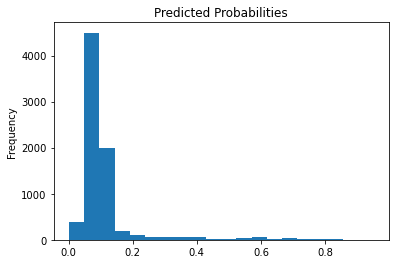

In [348]:
probs.plot(kind='hist', bins=20, title='Predicted Probabilities')

(0.0, 1.05)

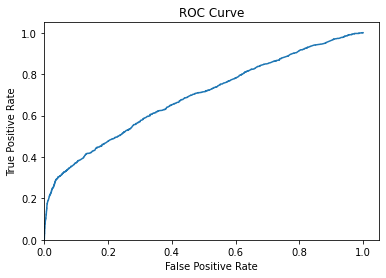

In [349]:
fpr, tpr, _ = roc_curve(ytest, probs)
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim(0,)
plt.ylim(0,)

In [351]:
result_boosted_tree = est.evaluate(eval_input_fn)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
The value of AUC returned by this may race with the update so this is deprecated. Please use tf.keras.metrics.AUC instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-08T21:38:02Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpizmblszp/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.45349s
INFO:tensorflow:Finished evaluation at 2020-12-08-21:38:03
INFO:tensorflow:Saving dict for global step 100: accuracy = 0.901425, accuracy_baseline = 0.8907047, auc = 0.6898023, auc_precision_recall = 0.335755, average_loss = 0.30506516, global_step = 100, label/mean = 0.10929533, loss = 0.30506516, precision = 0.6814159, prediction/mean = 0.112015806, recall = 0.18421052
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warn

# Results for Boosted Trees Model 

In [352]:
print(pd.Series(result_boosted_tree))

accuracy                  0.901425
accuracy_baseline         0.890705
auc                       0.689802
auc_precision_recall      0.335755
average_loss              0.305065
label/mean                0.109295
loss                      0.305065
precision                 0.681416
prediction/mean           0.112016
recall                    0.184211
global_step             100.000000
dtype: float64


# Results for Tensorflow Logistic Model

In [353]:
print(pd.Series(result))

accuracy                  0.901686
accuracy_baseline         0.890705
auc                       0.691204
auc_precision_recall      0.338022
average_loss              0.306469
label/mean                0.109295
loss                      0.306469
precision                 0.716495
prediction/mean           0.110794
recall                    0.166268
global_step             500.000000
dtype: float64


In [354]:
from sklearn import metrics

In [376]:
y0 = pd.Series(y_pred).map({'no':0, 'yes':1})

In [377]:
y1 = pd.Series(y_test).map({'no':0, 'yes':1})

In [381]:
y1 = np.array(y1) #pred

In [382]:
y0 = np.array(y0) #true

In [386]:
print('accuracy:', metrics.accuracy_score(y_test, y_pred),
     'precision:', metrics.precision_score(y0, y1),
     'recall:', metrics.recall_score(y0,y1))

accuracy: 0.9024262706546747 precision: 0.17234664070107109 recall: 0.6807692307692308


# Observations

It is hard to establish by just comparing at these three sets of measures of fit, which model is 'the best' of the three. All models seem to have around the same accuracy score. The AUC score does not change signficantly between the logistic model and the boosted trees model. A score of $AUC \approx 0.69 $ means that our models are able to distinguish between positive class and negative class about 69% of the time. It is interesting to see the huge difference in recall and precisition when comparing TensorFlow models to the SciKit Learn model. It almost seems as if they were labeled in the opposite way in each set of models.

What Model to Choose?: (comparing only among TensorFlow)
* We would recommend choosing the Logistic Regression model because of its higher precision. This means that it is better equipped at not labeling a customer as 'Yes they will enroll' when they will not. In this way less money will be spent on customers that will not enroll.